In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
datasets=tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=datasets.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(datasets)#each images are taken into a batch 2150 imgs->68 batches

68

[1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0]
(32, 256, 256, 3)


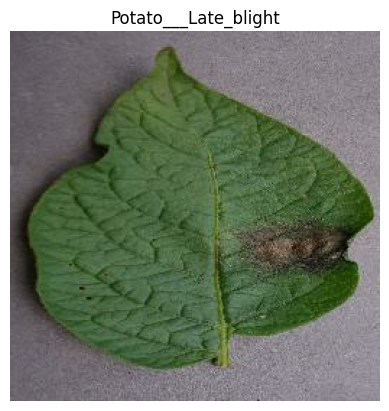

In [14]:
for img_batch, label in datasets.take(1):
   # print(img_batch)
    print(label.numpy())
    print(img_batch.shape)
    plt.imshow(img_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    
    plt.title(class_names[label[0]])

<h3> for training the data 80%->Training<br>20%-> 10%validation on each epoch 10%test</h3>

In [15]:
train_size=0.8
len(datasets)*train_size

54.400000000000006

In [16]:
train_ds=datasets.take(54)
len(train_ds)

54

In [17]:
test_ds=datasets.skip(54)
len(test_ds)

14

In [20]:
val_size=0.1
len(datasets)*val_size

6.800000000000001

In [21]:
Test_ds=test_ds.skip(6)
len(Test_ds)

8

<h3>just to combine the the functions in one place for data splitting</h3>

In [25]:
def get_data_partition(ds,train_split=0.8,val_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [27]:
train_ds,val_ds,test_ds=get_data_partition(datasets)
len(train_ds)

54

In [32]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [36]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
])

In [39]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(factor=0.2),
])